In [50]:
## import libraries 

import pandas as pd

In [51]:
## read the file 
df = pd.read_csv('tested.csv')

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
## information about dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [55]:
### cleaning 

In [56]:
# first findout for the missing values 

In [57]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [58]:
## filling missing values of age column with median 

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [60]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
## check for duplicates 

In [62]:
df.duplicated().sum()

0

In [63]:
## removing the un useful columns 

In [64]:
df = df.drop(columns = ['Name','Ticket','PassengerId','Cabin'])

In [65]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,27.0,0,0,8.0500,S


In [66]:
## convert categorical types into numerical 

In [67]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [68]:
df['Embarked'] = df['Embarked'].map({'C':0,'Q':1,'S':2})

In [69]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,2
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,2
4,1,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500,2
414,1,1,1,39.0,0,0,108.9000,0
415,0,3,0,38.5,0,0,7.2500,2
416,0,3,0,27.0,0,0,8.0500,2


In [70]:
### Feature Engineering 

In [71]:
# make new columns based on features 

In [72]:
df['Familysize'] = df['SibSp']+df['Parch']

In [73]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,2,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,2,0
4,1,3,1,22.0,1,1,12.2875,2,2
...,...,...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500,2,0
414,1,1,1,39.0,0,0,108.9000,0,0
415,0,3,0,38.5,0,0,7.2500,2,0
416,0,3,0,27.0,0,0,8.0500,2,0


In [ ]:
### check for outliers and remove if any 

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

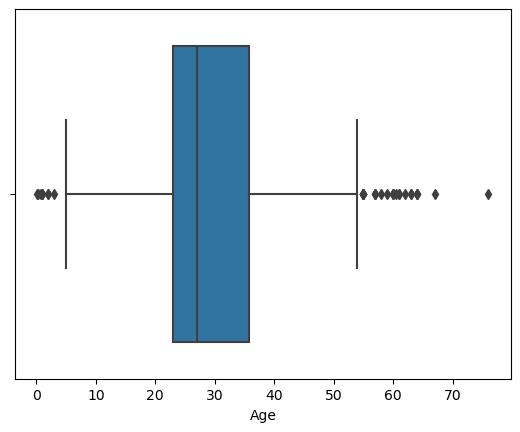

In [75]:
sns.boxplot(x=df['Age'])
plt.show()

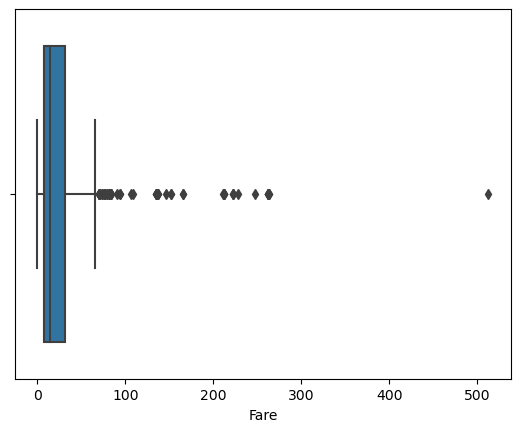

In [76]:
sns.boxplot(x=df['Fare'])
plt.show()

In [77]:
### standardise columns for better model deployment

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [82]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
0,0,3,0,0.452723,0,0,0.015282,1,0
1,1,3,1,0.617566,1,0,0.013663,2,1
2,0,2,0,0.815377,0,0,0.018909,1,0
3,0,3,0,0.353818,0,0,0.016908,2,0
4,1,3,1,0.287881,1,1,0.023984,2,2
...,...,...,...,...,...,...,...,...,...
413,0,3,0,0.353818,0,0,0.015713,2,0
414,1,1,1,0.512066,0,0,0.212559,0,0
415,0,3,0,0.505473,0,0,0.014151,2,0
416,0,3,0,0.353818,0,0,0.015713,2,0


In [84]:
## convert into a csv or excel file for predictions 

In [83]:
df.to_csv('clean_titanic.csv')